In [11]:
# Importing Libraries

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='viridis')
%matplotlib inline

In [3]:
anime_data = pd.read_csv('anime.csv')
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


# Data Pre-Processing

In [4]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
anime_data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [6]:
anime_data.shape

(12294, 7)

In [7]:
anime_data.dtypes

,0
anime_id,int64
name,object
genre,object
type,object
episodes,object
rating,float64
members,int64


In [8]:
for col in anime_data.columns:
  print(f"Unique values in column '{col}': {anime_data[col].nunique()}")

Unique values in column 'anime_id': 12294
Unique values in column 'name': 12292
Unique values in column 'genre': 3264
Unique values in column 'type': 6
Unique values in column 'episodes': 187
Unique values in column 'rating': 598
Unique values in column 'members': 6706


In [9]:
anime_data.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [10]:
# Handling Missing Values

anime_data['genre'].fillna(anime_data['genre'].mode()[0], inplace=True)
anime_data['type'].fillna(anime_data['type'].mode()[0], inplace=True)
anime_data['rating'].fillna(anime_data['rating'].mean(), inplace=True)

<ipython-input-10-7289eca1d668>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anime_data['genre'].fillna(anime_data['genre'].mode()[0], inplace=True)
<ipython-input-10-7289eca1d668>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

<Axes: xlabel='count', ylabel='type'>

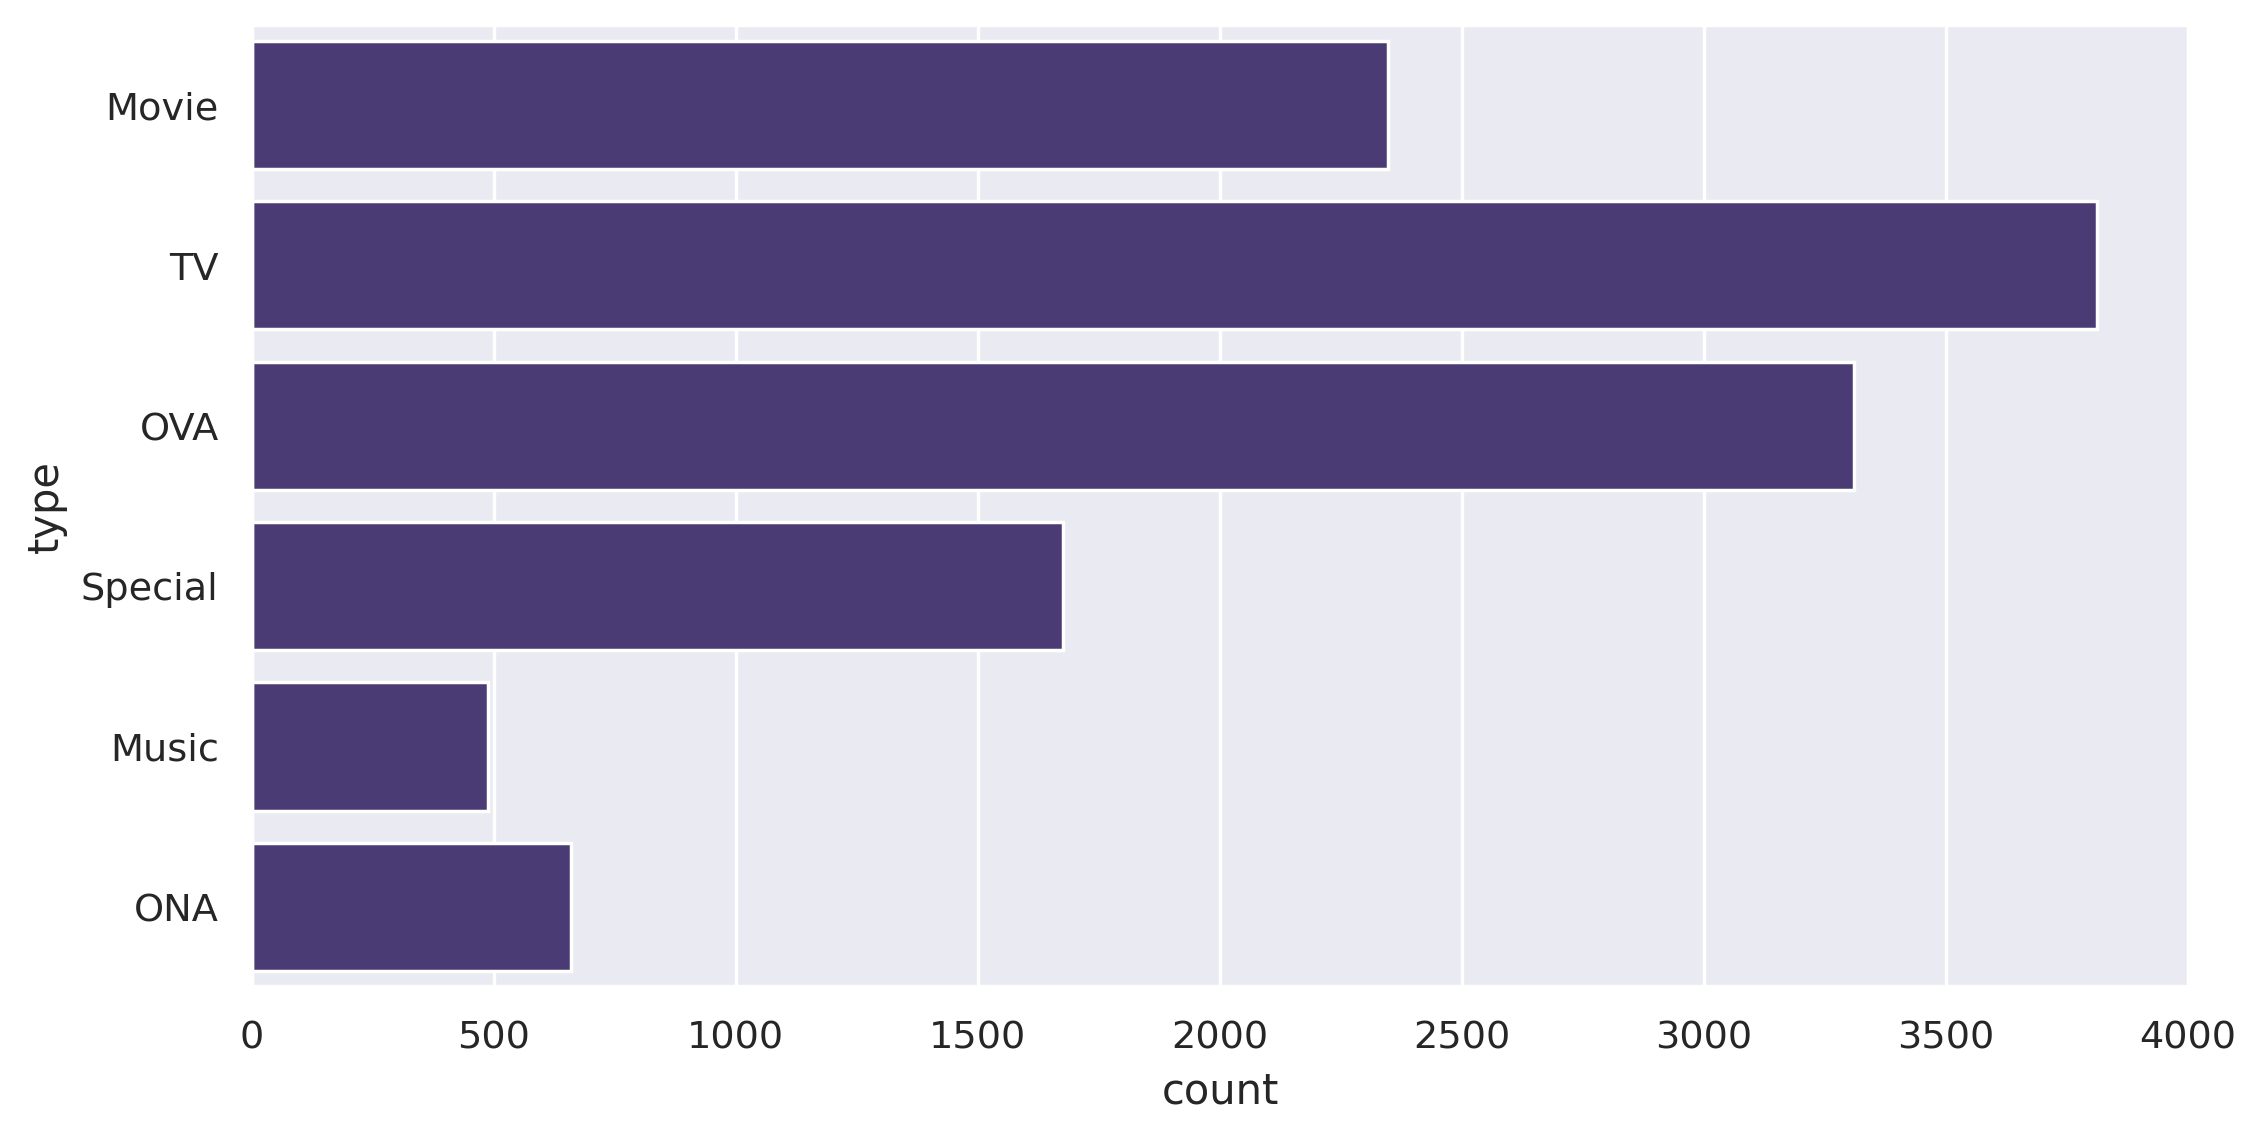

In [12]:
# Data Visualiaztion

sns.countplot(y = 'type', data = anime_data)

In [13]:
# Checking the Value Counts in Genre column

anime_data['genre'].value_counts()

,count
genre,
Hentai,885
Comedy,523
Music,301
Kids,199
"Comedy, Slice of Life",179
...,...
"Adventure, Drama, Fantasy, Game, Sci-Fi",1
"Adventure, Demons, Fantasy, Historical",1
"Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen",1


<Axes: xlabel='rating', ylabel='count'>

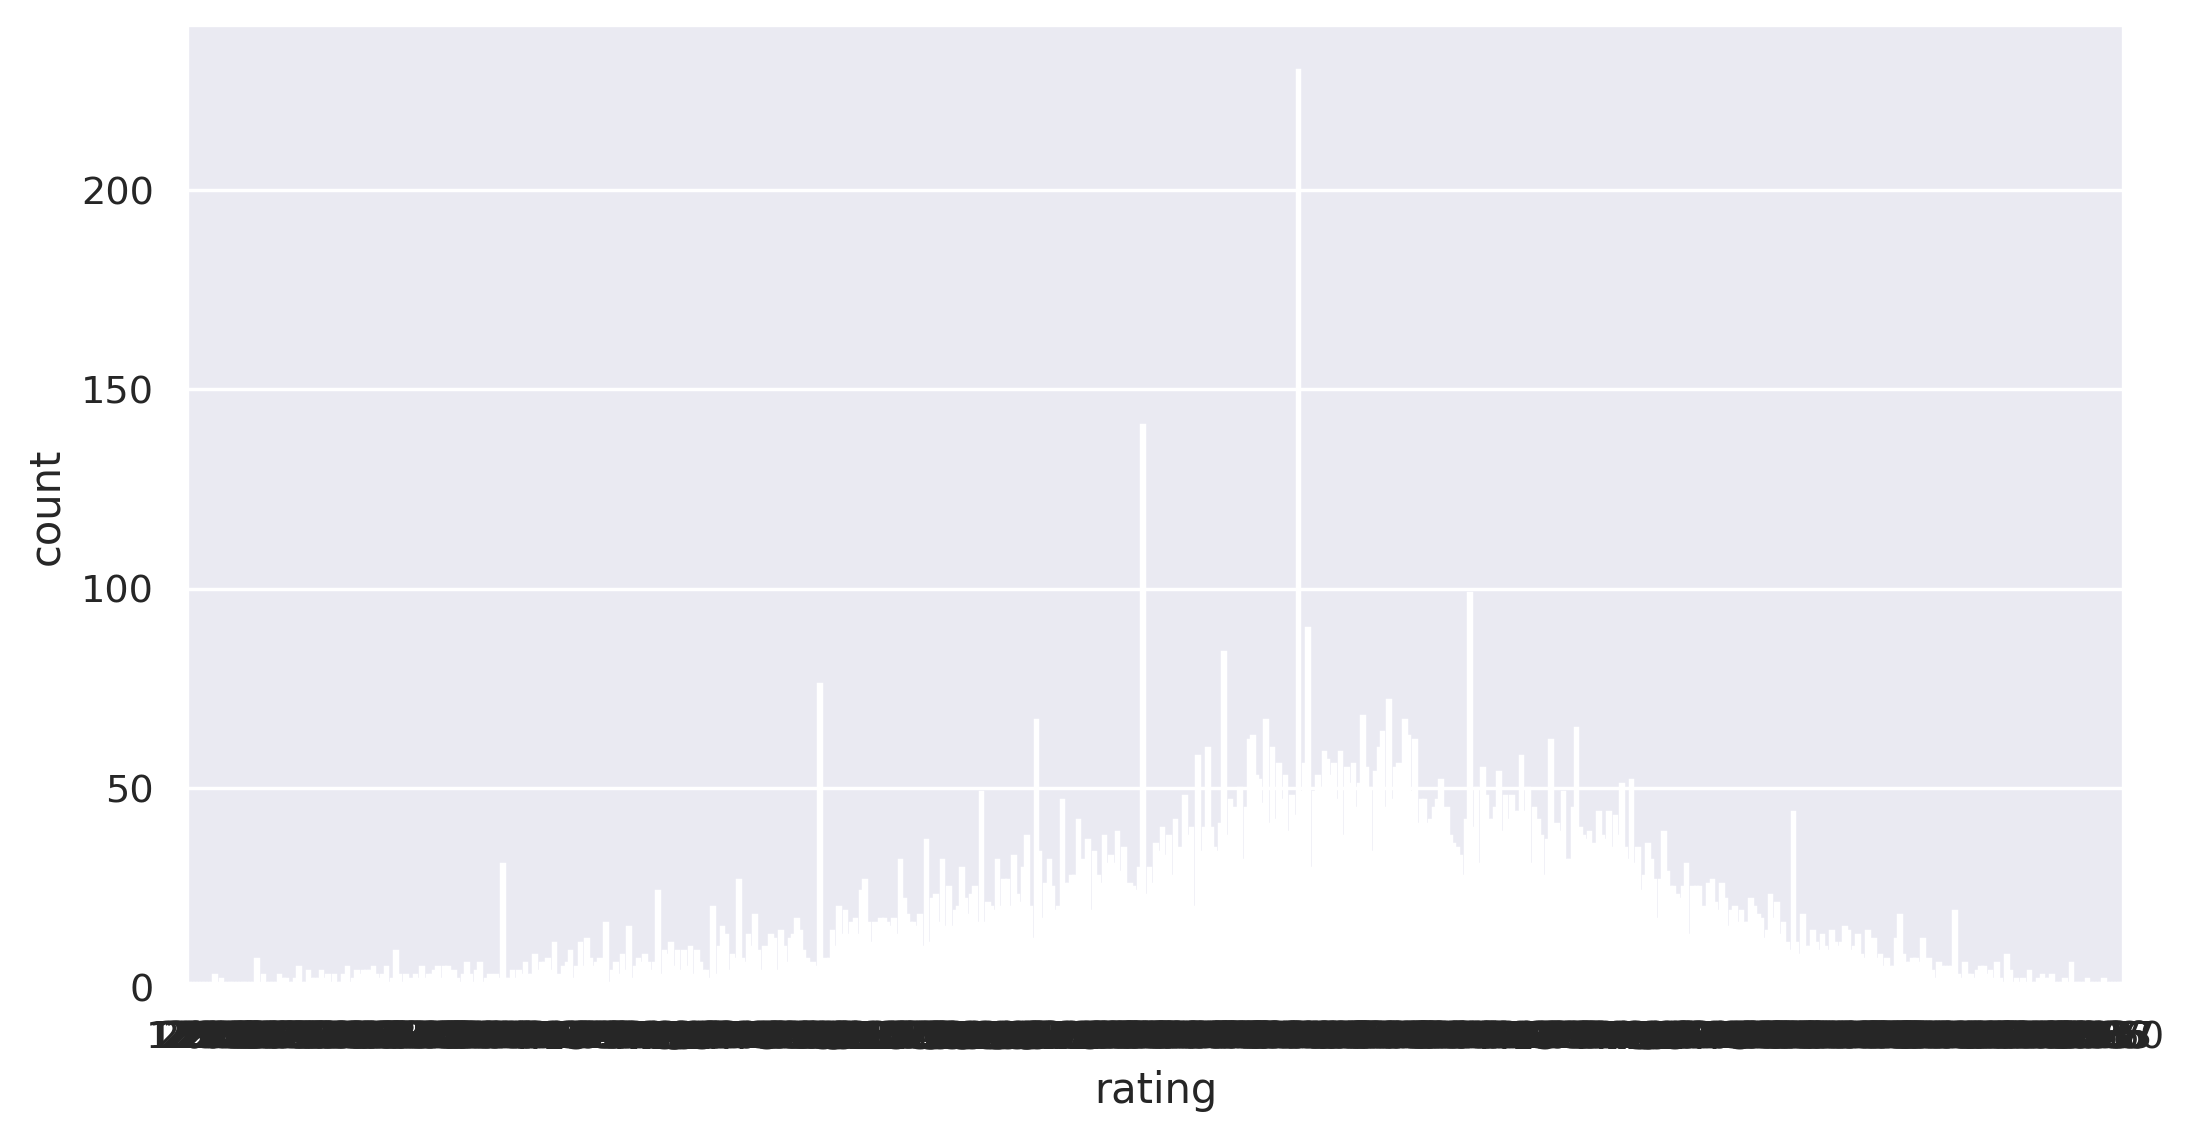

In [14]:
sns.countplot(x = anime_data['rating'])

In [15]:
anime_data['anime_id'].value_counts()

,count
anime_id,
32281,1
30404,1
26013,1
26017,1
15787,1
...,...
12455,1
28789,1
373,1


In [16]:
anime_data['name'].value_counts()

,count
name,
Shi Wan Ge Leng Xiaohua,2
Saru Kani Gassen,2
Bakabon Osomatsu no Karee wo Tazunete Sansenri,1
Backkom Meogeujan Yeohaeng,1
Backkom Mission Impossible,1
...,...
Yoroiden Samurai Troopers Kikoutei Densetsu,1
Yuu☆Yuu☆Hakusho: Mu Mu Hakusho,1
3-gatsu no Lion meets Bump of Chicken,1


In [17]:
# Convert genres into a numerical representation
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(anime_data['genre'].str.split(', '))
genre_df = pd.DataFrame(genre_matrix, columns=mlb.classes_)

In [18]:
# Combine the genre DataFrame with the original DataFrame
anime_data = anime_data.join(genre_df)

In [19]:
# Step 6: Normalize the rating feature
anime_data['rating'] = (anime_data['rating'] - anime_data['rating'].min()) / (anime_data['rating'].max() - anime_data['rating'].min())

In [20]:
# Step 7: Prepare features for cosine similarity
features = anime_data.drop(columns=['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'])

In [21]:
# Step 8: Compute cosine similarity
cosine_sim = cosine_similarity(features)

In [23]:
cosine_sim[5]

array([0.4472136, 0.3380617, 0.3380617, ..., 0.       , 0.       ,
       0.       ])

In [24]:
cosine = pd.DataFrame(cosine_sim)
cosine.head()

,0,1,2,3,4,5,6,7,8,9,...,12284,12285,12286,12287,12288,12289,12290,12291,12292,12293
0,1.000000,0.188982,0.000000,0.000000,0.000000,0.447214,0.000000,0.250000,0.000000,0.000000,...,0.0,0.288675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.188982,1.000000,0.285714,0.000000,0.285714,0.338062,0.566947,0.377964,0.285714,0.285714,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.285714,1.000000,0.267261,1.000000,0.338062,0.377964,0.188982,1.000000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.267261,1.000000,0.267261,0.000000,0.000000,0.353553,0.267261,0.267261,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.285714,1.000000,0.267261,1.000000,0.338062,0.377964,0.188982,1.000000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Recommendation Function

In [27]:
# Function For Recommending Movies

def recommend_movies(anime_title, cosine_sim=cosine_sim, anime_data=anime_data):
    """
    Recommends anime based on cosine similarity.

    Args:
        anime_title: The title of the anime to find recommendations for.
        cosine_sim: The cosine similarity matrix.
        anime_data: The anime DataFrame.

    Returns:
        A list of recommended anime titles.
    """
    try:
        # Get the index of the anime
        idx = anime_data[anime_data['name'] == anime_title].index[0]

        # Get the pairwise similarity scores
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Sort the anime based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the scores of the 10 most similar anime
        sim_scores = sim_scores[1:11]

        # Get the anime indices
        anime_indices = [i[0] for i in sim_scores]

        # Return the top 10 most similar anime
        return anime_data['name'].iloc[anime_indices]
    except IndexError:
        print(f"Anime '{anime_title}' not found in the dataset.")
        return []

In [28]:
# getting result from Recommend Function

recommend_movies('Naruto')

,name
615,Naruto: Shippuuden
841,Naruto
1103,Boruto: Naruto the Movie - Naruto ga Hokage ni...
1343,Naruto x UT
1472,Naruto: Shippuuden Movie 4 - The Lost Tower
1573,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...
2458,Naruto Shippuuden: Sunny Side Battle
2997,Naruto Soyokazeden Movie: Naruto to Mashin to ...
175,Katekyo Hitman Reborn!
7628,Kyutai Panic Adventure!


In [29]:
# Assuming 'y_true' represents the actual genres and 'y_pred' represents the predicted genres
# Since the provided code doesn't explicitly define a target variable (y_true) for prediction
# I am creating dummy y_true and y_pred for demonstration purposes.

# Dummy example of true and predicted genres
y_true = anime_data['genre'].str.split(', ').tolist()

y_pred = anime_data['genre'].str.split(', ').tolist()

# Using MultiLabelBinarizer to convert lists of strings into binary matrices
mlb = MultiLabelBinarizer()

y_true = mlb.fit_transform(y_true)
y_pred = mlb.transform(y_pred)

# Now y_true and y_pred are binary matrices, ready for evaluation metrics.

# Example evaluation:  precision, recall, F1-score for multi-label classification
precision = precision_score(y_true, y_pred, average='micro')  # Use 'micro' for multi-label
recall = recall_score(y_true, y_pred, average='micro')
f1 = f1_score(y_true, y_pred, average='micro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 1.0
Recall: 1.0
F1-score: 1.0


# Interview Questions

1. Can you explain the difference between user-based and item-based collaborative filtering?

- User-based Collaborative Filtering:
This method recommends items to a user based on the preferences of similar users. It identifies users with similar behavior or preferences (using metrics like cosine similarity or Pearson correlation) and suggests items that those similar users have liked or interacted with.

- Item-based Collaborative Filtering:
This method focuses on item similarity rather than users. It identifies items that are similar to what a user has interacted with or liked. Recommendations are based on the preferences of users who interacted with similar items.

- Key Difference:

- User-based focuses on user similarity to recommend items.
- Item-based focuses on item similarity to recommend items.

2. What is collaborative filtering, and how does it work?

- What is Collaborative Filtering?
  - Collaborative filtering is a recommendation technique that suggests items to users based on their past interactions and the preferences of other users. It leverages collective user behavior to make predictions.

- How Does it Work?
  - It works by analyzing patterns in user-item interactions, such as ratings, purchases, or clicks. Collaborative filtering identifies similarities either between users (user-based) or between items (item-based) to generate recommendations. It assumes that users with similar preferences or items with similar attributes are likely to be relevant.

- Collaborative filtering is a powerful recommendation technique that relies on shared user behavior and preferences. By identifying similarities between users or items, it personalizes suggestions effectively. Its simplicity and ability to adapt make it widely used across recommendation systems.